# Reduced Quantum Genetic Algorithm With Less Changes

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from collections import Counter
import numpy as np

Lets init our circuit and put each qubit in superposition and in a random state :

[0.03736008 0.3781808  0.064741   0.43360499 0.3592157  0.38348659]


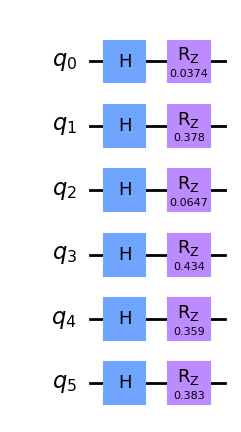

In [2]:
n = 6

circuit = QuantumCircuit(n)
circuit.h(range(n))
rand_theta = np.random.uniform(0, np.pi/n, n)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl")

Now let's make a Grover Algorithm
First we need to create an Oracle that change state of the expected value

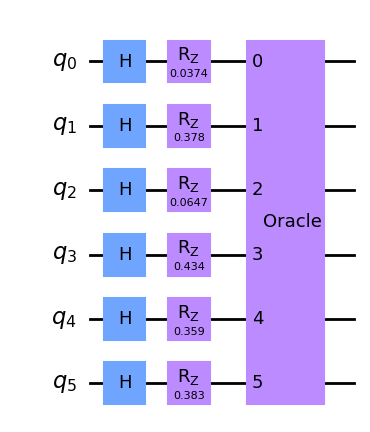

In [3]:
expected = 8

oracle = np.identity(2**n)
oracle[expected][expected] = -1

circuit.unitary(oracle, range(n), label='Oracle')
circuit.draw(output = "mpl")

Now we can add the Grover Inverse

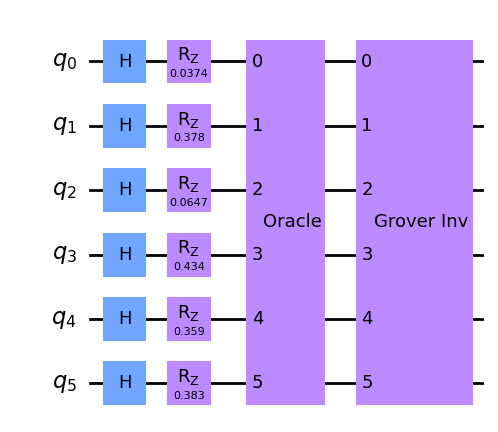

In [4]:
def ia(size):
    ia_mat=2*np.ones(size)/size
    ia_mat=ia_mat-np.identity(size)
    return ia_mat
GIM = ia(2**n)
circuit.unitary(GIM,range(n), label='Grover Inv')

circuit.draw(output = "mpl")

And finally we measure all qubits from our circuit multiple time to get some probabilities

In [5]:
circuit.measure_all()

Counter({'001000': 1196, '000000': 311, '111111': 271, '000001': 271, '111110': 267, '000100': 265, '111011': 254, '111010': 231, '000101': 227, '000010': 173, '101111': 168, '010000': 165, '010100': 164, '100000': 161, '000110': 159, '101110': 157, '110110': 155, '111100': 154, '111000': 148, '011010': 147, '110010': 141, '000111': 140, '010001': 139, '000011': 136, '100001': 135, '111001': 135, '101011': 135, '110011': 134, '111101': 134, '010101': 133, '011111': 133, '001101': 131, '011110': 129, '110111': 126, '011011': 125, '100100': 123, '001001': 123, '001100': 122, '011100': 116, '101100': 115, '100101': 112, '101000': 111, '010010': 107, '011001': 107, '011000': 106, '001111': 103, '110000': 103, '101010': 102, '100010': 101, '110101': 100, '110001': 100, '010110': 99, '100110': 98, '001011': 98, '110100': 96, '001110': 96, '001010': 93, '100111': 93, '101001': 91, '010011': 90, '010111': 89, '100011': 88, '011101': 85, '101101': 83})


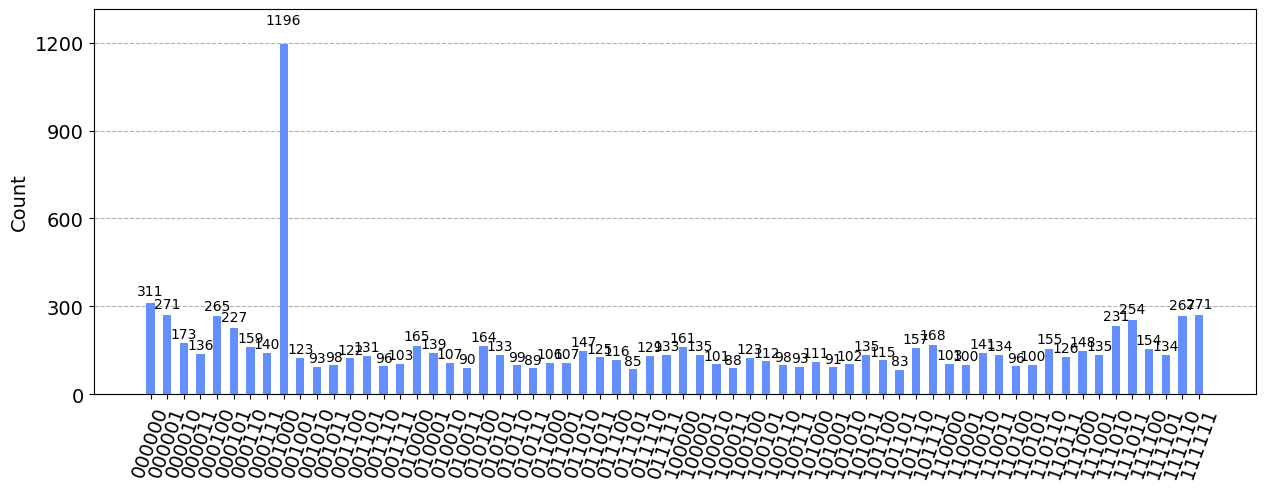

In [6]:
sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=10000).result().get_counts())
print(result)
plot_histogram(result, figsize=(15, 5))